In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

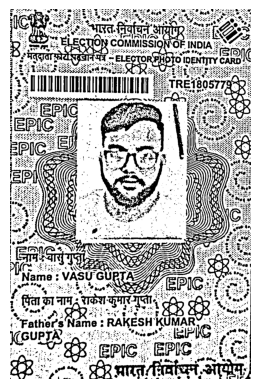

In [2]:
image = cv2.imread("data\\voter.jpg")
rgb_image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred =  cv2.GaussianBlur(gray, (5, 5), 0)
adp_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)
plt.imshow(adp_thresh, cmap='Greys_r')
plt.axis("off")
plt.show()

In [3]:
image.shape

(1512, 985, 3)

contours (0, 0, 985, 1512)
Area 1434159.0


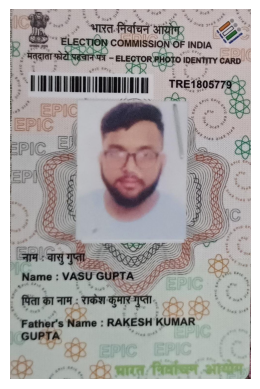

117

In [ ]:
image = cv2.imread("data\\voter.jpg")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred =  cv2.GaussianBlur(gray, (5, 5), 0)
adp_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)
contours, _ = cv2.findContours(adp_thresh, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour (assuming the ID card is the largest object)
largest_contour = None
largest_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > largest_area:
        largest_contour = cnt
        largest_area = area

x, y, w, h = cv2.boundingRect(largest_contour)

print("contours", (x, y, w, h))
print("Area", largest_area)
contour_id = rgb_image[y:y+h, x:x+w]

plt.imshow(contour_id)
plt.axis('off')
plt.show()

len(contours)

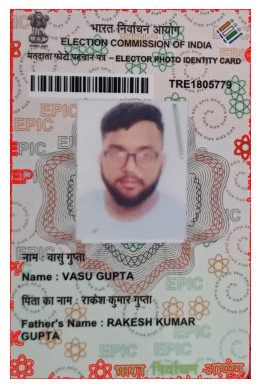

In [5]:
img_copy = rgb_image.copy()
cv2.drawContours(img_copy, contours, -1, (255, 0, 0), 2)
plt.imshow(img_copy)
plt.axis('off')
plt.show()


In [6]:
import easyocr

reader = easyocr.Reader(['en'])

result = reader.readtext(contour_id)

result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
d:\Projects\EKYC\ekyc\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[([[np.int32(318), np.int32(42)],
   [np.int32(711), np.int32(42)],
   [np.int32(711), np.int32(116)],
   [np.int32(318), np.int32(116)]],
  'HRa frafa; 31k',
  np.float64(0.05290071567260735)),
 ([[np.int32(198), np.int32(106)],
   [np.int32(831), np.int32(106)],
   [np.int32(831), np.int32(169)],
   [np.int32(198), np.int32(169)]],
  'ELECTION COMMISSION OF INDIA',
  np.float64(0.6094796990140122)),
 ([[np.int32(65), np.int32(175)],
   [np.int32(181), np.int32(175)],
   [np.int32(181), np.int32(213)],
   [np.int32(65), np.int32(213)]],
  'Haalat',
  np.float64(0.20311861682813093)),
 ([[np.int32(167), np.int32(161)],
   [np.int32(402), np.int32(161)],
   [np.int32(402), np.int32(226)],
   [np.int32(167), np.int32(226)]],
  '7dydrWA',
  np.float64(0.017975997468083916)),
 ([[np.int32(422), np.int32(153)],
   [np.int32(984), np.int32(153)],
   [np.int32(984), np.int32(234)],
   [np.int32(422), np.int32(234)]],
  'ELECTORFhOTO IDENTITY CARDI(',
  np.float64(0.1912266740994918)),
 ([[np.

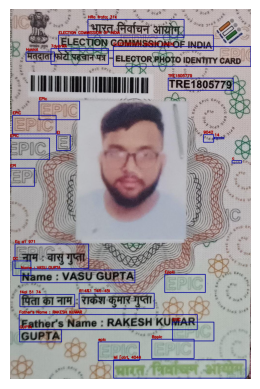

In [7]:
countour_copy =  np.copy(contour_id)

for detection in result:
    bounding_box = detection[0]
    recognized_text = detection[1]
    confidence = detection[2]
    
    # Convert the bounding box points to integers
    x_min, y_min = map(int, bounding_box[0])
    x_max, y_max = map(int, bounding_box[2])
    
    # Draw a rectangle around the text
    cv2.rectangle(countour_copy, (x_min, y_min), (x_max, y_max), (0, 0, 155), 2)
    
    # Put the recognized text on the image
    cv2.putText(countour_copy, recognized_text, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (155, 0, 0), 2)
        

plt.imshow(countour_copy)
plt.axis('off')
plt.show()
        

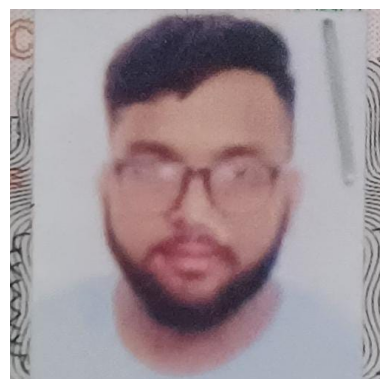

In [9]:
cascade_path = "data\\models\\haarcascade_frontalface_default.xml"

gray_img = cv2.cvtColor(contour_id, cv2.COLOR_BGR2GRAY)

# Load the Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cascade_path)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

faces
# Find the face with the largest area
max_area = 0
largest_face = None
for (x, y, w, h) in faces:
    area = w * h
    if area > max_area:
        max_area = area
        largest_face = (x, y, w, h)

# Extract the largest face
if largest_face is not None:
    (x, y, w, h) = largest_face
    extracted_face = rgb_image[y:y+h, x:x+w]
    

    # Increase dimensions by 15%
    new_w = int(w * 1.50)
    new_h = int(h * 1.50)
    
    # Calculate new (x, y) coordinates to keep the center of the face the same
    new_x = max(0, x - int((new_w - w) / 2))
    new_y = max(0, y - int((new_h - h) / 2))

    # Extract the enlarged face
    extracted_face = contour_id[new_y:new_y+new_h, new_x:new_x+new_w]

plt.imshow(extracted_face)
plt.axis('off')
plt.show()

In [10]:
cv2.imwrite("data\\voter_extracted_face.jpg", extracted_face)

True

In [11]:
import cv2
import face_recognition

face1 = face_recognition.load_image_file("data\\voter_extracted_face.jpg")
face1 = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

face2 = face_recognition.load_image_file("data\\voter_extracted_face.jpg")
face2 = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)

face3 = face_recognition.load_image_file("data\\photo.jpg")
face3 = cv2.cvtColor(face3, cv2.COLOR_BGR2RGB)

#--Converting image into encodings
face_encode1 = face_recognition.face_encodings(face1)[0]
face_encode2 = face_recognition.face_encodings(face2)[0]
face_encode3 = face_recognition.face_encodings(face3)[0]

d:\Projects\EKYC\ekyc\Lib\site-packages\face_recognition_models\__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [12]:
len(face_encode1)

128

In [13]:
print(face_recognition.compare_faces([face_encode1],face_encode2)[0])
print(face_recognition.compare_faces([face_encode3],face_encode2)[0])

True
True
